# Análisis de Rutas Combinadas
Este notebook está dedicado a la extracción y análisis de rutas específicas que son de nuestro interés, mediante la comparación de diversas métricas asignadas a cada ruta. Utilizamos estas comparativas para identificar patrones, eficiencias o áreas de mejora en las rutas seleccionadas.

A lo largo de este análisis, generamos visualizaciones que nos permiten observar no solo las métricas de interés, sino también el contexto más amplio en el que se desarrollan nuestras rutas. Este enfoque nos facilita una comprensión más profunda de los datos, permitiéndonos tomar decisiones informadas sobre posibles ajustes o mejoras.



# Combinaciones de rutas

In [3]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd


import matplotlib.pyplot as plt


### Cargamos Secuencias de rutas

In [ ]:
#rutaspacifico = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Pacifico.xlsx')
#rutascentro = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Centro.xlsx')
#rutasgolfo = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Golfo.xlsx')

In [ ]:
#rutaspacifico.dropna(axis=1, how='all', inplace=True)
#rutascentro.dropna(axis=1, how='all', inplace=True)
#rutasgolfo.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Reemplazamos los NaN por una cadena vacía y convertimos los números a texto con el formato 'PG####'
#rutaspacifico_str = rutaspacifico.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutascentro_str = rutascentro.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutasgolfo_str = rutasgolfo.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')


In [ ]:
# Combina las columnas en una cadena separada por comas
#rutaspacifico_str['secuencias_pacifico'] = rutaspacifico_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutascentro_str['secuencias_centro'] = rutascentro_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutasgolfo_str['secuencias_golfo'] = rutasgolfo_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)


In [ ]:
# Crear un nuevo DataFrame con una sola columna que contiene las secuencias
#df_secuencias_pacifico = pd.DataFrame({'secuencias_pacifico': rutaspacifico_str['secuencias_pacifico']})
#df_secuencias_centro = pd.DataFrame({'secuencias_centro': rutascentro_str['secuencias_centro']})
#df_secuencias_golfo = pd.DataFrame({'secuencias_golfo': rutasgolfo_str['secuencias_golfo']})


In [ ]:
# Verificar filas duplicadas en df_secuencias_pacifico
#duplicados_pacifico = df_secuencias_pacifico.duplicated()
#print("Filas duplicadas en Pacifico:", df_secuencias_pacifico[duplicados_pacifico])

# Verificar filas duplicadas en df_secuencias_centro
#duplicados_centro = df_secuencias_centro.duplicated()
#print("Filas duplicadas en Centro:", df_secuencias_centro[duplicados_centro])

# Verificar filas duplicadas en df_secuencias_golfo
#duplicados_golfo = df_secuencias_golfo.duplicated()
#print("Filas duplicadas en Golfo:", df_secuencias_golfo[duplicados_golfo])


In [ ]:
# Eliminar filas duplicadas en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.drop_duplicates()


In [ ]:
# Cambiar el nombre de la columna en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.rename(columns={'secuencias_centro': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.rename(columns={'secuencias_golfo': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.rename(columns={'secuencias_pacifico': 'secuencias'})

In [130]:
df_secuencias_centro.tail

<bound method NDFrame.tail of                                             secuencias ID_Ruta
0    PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1    PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
2    PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003
3    PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC004
4    PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC005
..                                                 ...     ...
499  PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...   RC500
500  PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...   RC501
501  PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...   RC502
502  PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...   RC503
503  PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...   RC504

[504 rows x 2 columns]>

In [ ]:
df_secuencias_centro.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')


In [ ]:
# Definir los nombres y prefijos de los identificadores para cada área
#nombres_areas = ['pacifico', 'centro', 'golfo']
#prefijos_areas = ['RP', 'RC', 'RG']

# Iterar sobre cada DataFrame y su respectivo nombre de área
#for nombre_area, prefijo_area in zip(nombres_areas, prefijos_areas):
    # Obtener el DataFrame correspondiente
#    df = globals()[f"df_secuencias_{nombre_area}"]
    
    # Generar identificadores únicos para cada secuencia en el DataFrame
#    identificadores = [f"{prefijo_area}{i+1:03d}" for i in range(len(df))]
    
    # Agregar la columna 'ID_Ruta' con los identificadores al DataFrame
#    df['ID_Ruta'] = identificadores
    
    # Reordenar las columnas
#    df = df[['ID_Ruta', 'secuencias']]
    
    # Mostrar las primeras filas del DataFrame para verificar
#    print(f"DataFrame df_secuencias_{nombre_area} con identificadores:")
#    print(df.head())
    print()


### Guardamos df con secuencias

In [ ]:
#df_secuencias_pacifico.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
#df_secuencias_centro.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
#df_secuencias_golfo.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

In [139]:
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
df_secuencias_golfo = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

In [136]:
df_secuencias_centro

,secuencias,ID_Ruta
0,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC001
1,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC002
2,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC003
3,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC004
4,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC005
...,...,...
499,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC500
500,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC501
501,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC502
502,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC503


In [134]:
# Asumiendo que df_secuencias_centro es tu DataFrame

# Aplicamos una función que verifica el final de cada secuencia y, si termina en '694',
# le añade ',PG655, PG617, PG578'
df_secuencias_centro['secuencias'] = df_secuencias_centro['secuencias'].apply(
    lambda x: x + ', PG655, PG617, PG578' if x.endswith('694') else x
)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_centro.head())


                                          secuencias ID_Ruta
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
2  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003
3  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC004
4  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC005


In [138]:
# Filtramos para encontrar la fila con la ID_Ruta 'RC451'
secuencia_rc451 = df_secuencias_centro[df_secuencias_centro['ID_Ruta'] == 'RC451']['secuencias']

# Imprimimos la secuencia de la ruta 'RC451'
print('Secuencia de la ruta RC451:', secuencia_rc451.iloc[0])


Secuencia de la ruta RC451: PG1572, PG1533, PG1494, PG1417, PG1378, PG1339, PG1300, PG1262, PG1223, PG1224, PG1185, PG1146, PG1107, PG1108, PG1169, PG1070, PG1031, PG992, PG993, PG994, PG995, PG956, PG957, PG996, PG997, PG959, PG921, PG922, PG883, PG884, PG845, PG846, PG807, PG808, PG769, PG770, PG771, PG732, PG693, PG694,PG655, PG617, PG578


In [150]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Verificamos si la secuencia termina en '694'
    if row['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual
        row['secuencias'] += ', PG774'
        # Añadimos la fila modificada a la lista de nuevas filas
        nuevas_filas.append(row)
        

        # Añadimos la nueva fila a la lista de nuevas filas
        nuevas_filas.append(nueva_fila)
    else:
        # Si no termina en '694', añadimos la fila sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


                                          secuencias ID_Ruta
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
2  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003
3  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC004
4  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC005


In [160]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Creamos una copia de la fila actual para trabajar y posiblemente añadir al DataFrame
    fila_actual = row.copy()
    
    # Verificamos si la secuencia termina en 'PG5774'
    if fila_actual['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual reemplazando 'PG5774' con 'PG774'
        fila_actual['secuencias'] = fila_actual['secuencias'][:-7] + 'PG774'
    
    # Añadimos la fila modificada a la lista de nuevas filas
    nuevas_filas.append(fila_actual)

    # Si la secuencia fue modificada, añadimos una nueva fila con otra secuencia corregida
    if fila_actual['secuencias'] != row['secuencias']:
        nueva_fila = fila_actual.copy()
        nueva_fila['secuencias'] += ',PG655, PG695, PG734, PG5774'
        nuevas_filas.append(nueva_fila)
    else:
        # Si la secuencia no terminó en 'PG5774', añadimos la fila sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


                                          secuencias ID_Ruta
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
2  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
3  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
4  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003


In [170]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Verificamos si la secuencia termina en 'PG5774'
    if row['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual quitando el 'PG5774' incorrecto y añadiendo 'PG774'
        secuencia_corregida = row['secuencias'][:-7] + 'PG774'
        # Creamos la nueva fila con la secuencia corregida
        nueva_fila_corregida = row.copy()
        nueva_fila_corregida['secuencias'] = secuencia_corregida
        # Añadimos la fila corregida a la lista de nuevas filas
        nuevas_filas.append(nueva_fila_corregida)
        # Creamos otra fila nueva con la secuencia extendida
        secuencia_extendida = secuencia_corregida + ',PG655, PG695, PG734, PG5774'
        nueva_fila_extendida = row.copy()
        nueva_fila_extendida['secuencias'] = secuencia_extendida
        # Añadimos la fila extendida a la lista de nuevas filas
        nuevas_filas.append(nueva_fila_extendida)
    else:
        # Si la secuencia no termina en 'PG5774', la añadimos sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


                                          secuencias ID_Ruta
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
2  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003
3  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC004
4  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC005


In [180]:
# Buscamos 'PG5774' en las secuencias
contiene_PG5774 = df_secuencias_modificado['secuencias'].str.contains('PG5774')

# Verificamos si hay alguna secuencia que todavía contenga 'PG5774'
hay_PG5774 = contiene_PG5774.any()

# Imprimimos el resultado
print("¿Hay secuencias que todavía contienen 'PG5774'?:", hay_PG5774)


¿Hay secuencias que todavía contienen 'PG5774'?: True


In [17]:
# Encuentra todas las secuencias que contienen 'PG5774'
#secuencias_con_PG5774 = df_secuencias_modificado[df_secuencias_modificado['secuencias'].str.contains('PG5774')]

# Muestra las secuencias que contienen 'PG5774'
##secuencias_con_PG5774


In [18]:
# Filtra el DataFrame para eliminar filas donde 'secuencias' contiene 'PG5774'
#df_secuencias_sin_PG5774 = df_secuencias_modificado[~df_secuencias_modificado['secuencias'].str.contains(',PG655, PG617, PG578')]

# Mostramos las primeras filas para verificar que las filas han sido eliminadas
#print(df_secuencias_sin_PG5774.head())


In [19]:
# Corrige las secuencias que terminan con ',PG774' agregando un espacio después de la coma
#df_secuencias_sin_PG5774['secuencias'] = df_secuencias_sin_PG5774['secuencias'].apply(
#    lambda x: x[:-5] + ', PG655, PG617, PG578' if x.endswith(',PG655, PG617, PG578') else x)

# Mostramos las primeras filas para verificar los cambios
#print(df_secuencias_sin_PG5774.head())


In [20]:
# Reset the index to help in generating the new ID_Ruta values
#df_secuencias_sin_PG5774.reset_index(drop=True, inplace=True)

# Generate new ID_Ruta values in the format 'RC' followed by a padded number
#df_secuencias_sin_PG5774['ID_Ruta'] = ['RC' + str(i + 1).zfill(3) for i in df_secuencias_sin_PG5774.index]

# Mostramos las primeras filas para verificar los cambios
#print(df_secuencias_sin_PG5774.head())


In [21]:
#ruta_archivo = '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv'
#df_secuencias_sin_PG5774.to_csv(ruta_archivo, index=False)
#print(f"El DataFrame ha sido guardado exitosamente en: {ruta_archivo}")


### Notas:

Al procesar las rutas, nos dimos cuenta que habia muchas secuencias duplicadas. Tambien sera importante a la hora de reproducir la ultima version del ejercicio, eliminar filas intermedias antes de procesar los datos

## Valores / ruta 

In [7]:
dfvalores = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [8]:
dfvalores.head()

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,14.904291,-92.260926,S,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,17.762097,-93.663441,G,PG1456,G-PG1456-1,97523,97523,0,0,3,0,0,0
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,18.027159,-92.774791,G,PG1495,G-PG1495-6,71661,92612,1,1,3,0,0,0
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,17.948786,-94.914575,G,PG1378,G-PG1378-4,45794,45863,1,1,3,2,2,12
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,17.470713,-91.422021,G,PG1572,G-PG1572-3,40069,55739,1,2,3,2,5,0


In [9]:
dfvalores.shape

(389, 16)

In [10]:
# Sort the DataFrame by 'eventos' in descending order
df_sorted = dfvalores.sort_values(by='inm_30km', ascending=False)

# If you want to reset the index after sorting and drop the old index
df_sorted = df_sorted.reset_index(drop=True)

print(df_sorted)

                               nombre                            ciudad  \
0                  Huehuetan, Chiapas                Huehuetan, Chiapas   
1                    Huixtla, Chiapas                  Huixtla, Chiapas   
2                  Tapachula, Chiapas                Tapachula, Chiapas   
3    San Jeronimo Zacualpan, Tlaxcala  San Jeronimo Zacualpan, Tlaxcala   
4                 Zacatelco, Tlaxcala               Zacatelco, Tlaxcala   
..                                ...                               ...   
384              Victoria, Tamaulipas              Victoria, Tamaulipas   
385      Acapulco de Juarez, Guerrero      Acapulco de Juarez, Guerrero   
386   San Andres Huaxpaltepec, Oaxaca   San Andres Huaxpaltepec, Oaxaca   
387                     Altar, Sonora                     Altar, Sonora   
388            Puerto Penasco, Sonora            Puerto Penasco, Sonora   

         estado    latitud    longitud codigo_ruta ID_Poligono codigo_unico  \
0       Chiapas  15.

#### Ciudad Top (Detenciones)

Filtramos el df de manera que nos quede la ciudad con mas detenciones de cada grid

#### Aqui tenemos que tomar la decision de como sacar el punto de referencia para asignar el valor de cada ruta:

    a) Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
    b) Agrupamos por 'ID_Poligono' y sacamos el promedio de 'detenciones' de todas las ciudades para cada grupo
    
  R: Aplicaremos metodo de promedio

In [13]:
# Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
ciudades_top_valores = dfvalores.loc[dfvalores.groupby('ID_Poligono')['eventos'].idxmax()]

# Calcular el promedio de detenciones para cada 'ID_Poligono' y redondearlo sin decimales
promedio_detenciones = dfvalores.groupby('ID_Poligono')['eventos'].mean().round(0)

# Resetear el índice si es necesario
ciudades_top_valores.reset_index(drop=True, inplace=True)

# Agregar la columna 'promedio_detenciones' al DataFrame resultante
ciudades_top_valores['promedio_eventos'] = ciudades_top_valores['ID_Poligono'].map(promedio_detenciones)

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(ciudades_top_valores.head())




                            nombre                           ciudad  \
0  Zihuatanejo de Azueta, Guerrero  Zihuatanejo de Azueta, Guerrero   
1               Morelia, Michoacan               Morelia, Michoacan   
2               Cuitzeo, Michoacan               Cuitzeo, Michoacan   
3             Irapuato, Guanajuato             Irapuato, Guanajuato   
4               Ocampo, Guanajuato               Ocampo, Guanajuato   

       estado    latitud    longitud codigo_ruta ID_Poligono codigo_unico  \
0    Guerrero  17.807900 -101.496952           P      PG1027   P-PG1027-1   
1   Michoacan  19.702712 -101.192382           P      PG1029   P-PG1029-1   
2   Michoacan  19.969314 -101.141220           P      PG1030   P-PG1030-1   
3  Guanajuato  20.675876 -101.352105           C      PG1031   C-PG1031-2   
4  Guanajuato  21.604282 -101.476239           C      PG1032   C-PG1032-1   

   eventos  eventos_in_grid  inm_30km  inm_in_grid  inm_in_estado  sc_30km  \
0       14               14     

In [8]:
ciudades_top_valores.head(60)

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,promedio_detenciones
0,"Zihuatanejo de Azueta, Guerrero","Zihuatanejo de Azueta, Guerrero",Guerrero,17.807900,-101.496952,P,PG1027,P-PG1027-1,14,14,1,0,1,0,0,1,14.000000
1,"Morelia, Michoacan","Morelia, Michoacan",Michoacan,19.702712,-101.192382,P,PG1029,P-PG1029-1,137,137,0,0,0,0,0,1,137.000000
2,"Cuitzeo, Michoacan","Cuitzeo, Michoacan",Michoacan,19.969314,-101.141220,P,PG1030,P-PG1030-1,1,1,0,0,0,0,1,1,1.000000
3,"Irapuato, Guanajuato","Irapuato, Guanajuato",Guanajuato,20.675876,-101.352105,C,PG1031,C-PG1031-2,44,52,0,0,0,5,8,23,17.333333
4,"Ocampo, Guanajuato","Ocampo, Guanajuato",Guanajuato,21.604282,-101.476239,C,PG1032,C-PG1032-1,6,6,0,0,0,0,0,23,6.000000
5,"Monclova, Coahuila","Monclova, Coahuila",Coahuila,26.899999,-101.417117,C,PG1040,C-PG1040-1,1207,1207,0,0,4,0,0,27,1207.000000
6,"Zinapecuaro, Michoacan","Zinapecuaro, Michoacan",Michoacan,19.856318,-100.770910,P,PG1069,P-PG1069-1,176,177,0,0,0,0,1,1,88.500000
7,"Comonfort, Guanajuato","Comonfort, Guanajuato",Guanajuato,20.719947,-100.761188,C,PG1070,C-PG1070-2,29,80,0,0,0,4,6,23,16.000000
8,"San Luis de la Paz, Guanajuato","San Luis de la Paz, Guanajuato",Guanajuato,21.297047,-100.516269,C,PG1071,C-PG1071-1,60,60,0,0,0,0,0,23,60.000000
9,"San Luis Potosi, San Luis Potosi","San Luis Potosi, San Luis Potosi",San Luis Potosi,22.500000,-100.494914,C,PG1072,C-PG1072-1,4154,4154,0,1,1,0,4,4,4154.000000


## Rutas (Ordenado y Filtrado top 3 por region):

### Rutas Top 3 (Detenciones)

#### df_secuencias_pacifico

#### R:

Ruta con mas detenciones total: RP105

Ruta con menos detenciones total: RP639

In [6]:
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')


In [14]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
pacifico_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_pacifico.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    pacifico_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_pacifico_sumas = pd.DataFrame(pacifico_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_pacifico_sumas = df_pacifico_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [15]:
df_pacifico_sumas = df_pacifico_sumas.sort_values('detenciones_total', ascending=False)

In [16]:
# Step 1: Count the number of codes in each row
df_secuencias_pacifico['code_count'] = df_secuencias_pacifico['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_pacifico.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

                                          secuencias ID_Ruta  code_count
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RP001          68


In [17]:
df_pacifico_sumas.head(6)

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
0,RP001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0
463,RP464,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0
455,RP456,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0
456,RP457,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0
457,RP458,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0
458,RP459,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",0,0


##### Metodo Grupo: 
Tiene la finalidad de extraer grupos de rutas muy similares, para permitirnos identificar una escalacion de los datos mejor distribuida

 Si ocupamos las 3 mas, tenemos que considerar que hay que buscar la manera de filtrar las diferentes versiones de la misma secuencia mayoritaria

In [50]:
# Aquí debemos definir qué consideramos como 'primeras etapas'. Como ejemplo, usaremos las primeras 3 'PGxxx'
#df_pacifico_sumas['grupo'] = df_pacifico_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[:4])

# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_pacifico_sumas['grupo'] = df_pacifico_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-4:]))


# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_pacifico_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_pacifico_sumas_filtrado = df_pacifico_sumas.loc[idx].reset_index(drop=True)

# Eliminar la columna 'grupo' que se agregó para el filtrado
#df_pacifico_sumas_filtrado.drop(columns=['grupo'], inplace=True)


In [51]:
#df_pacifico_sumas_filtrado = df_pacifico_sumas_filtrado.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_pacifico_sumas_filtrado.head(40)


#### df_secuencias_centro

##### R:

Ruta con mas detenciones total: RC155

Ruta con menos detenciones total: RC862

In [3]:
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')



In [4]:
df_secuencias_centro

,secuencias,ID_Ruta
0,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC001
1,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC002
2,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC003
3,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC004
4,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",RC005
...,...,...
955,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC956
956,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC957
957,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC958
958,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",RC959


In [233]:
# Step 1: Count the number of codes in each row
df_secuencias_centro['code_count'] = df_secuencias_centro['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_centro.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

                                          secuencias ID_Ruta  code_count
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001          52


In [231]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
#centro_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
#for index, row in df_secuencias_centro.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
#    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
#    sumas = {
#        'detenciones_total': 0,
#        'detenciones_in_grid_total': 0,
#    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
#    for id_poligono in ids_poligono:
#        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
#        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
#            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
#            if col_name in data.columns:
#                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
#    centro_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
#df_centro_sumas = pd.DataFrame(centro_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
#df_centro_sumas = df_centro_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [217]:
df_centro_sumas = df_centro_sumas.sort_values('detenciones_total', ascending=False)

In [232]:
df_centro_sumas.head()

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
154,RC155,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",213731,276386
155,RC156,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",213731,276386
114,RC115,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",212859,275498
115,RC116,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",212859,275498
159,RC160,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",212065,274720


In [219]:
# Lista de ID_Ruta especificados
id_rutas_especificados = ['RC862']

# Filtrar el DataFrame por los ID_Ruta especificados y luego imprimir la columna 'secuencia'
for id_ruta in id_rutas_especificados:
    secuencia = df_centro_sumas[df_centro_sumas['ID_Ruta'] == id_ruta]['secuencia'].values[0]
    print(f"ID_Ruta: {id_ruta}, Secuencia: {secuencia}")


ID_Ruta: RC862, Secuencia: PG1572, PG1533, PG1494, PG1417, PG1378, PG1339, PG1300, PG1262, PG1223, PG1224, PG1185, PG1146, PG1107, PG1108, PG1169, PG1070, PG1031, PG992, PG993, PG994, PG995, PG956, PG957, PG996, PG997, PG959, PG921, PG922, PG883, PG884, PG845, PG846, PG807, PG808, PG769, PG808, PG809, PG848, PG887


In [23]:
# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_centro_sumas['grupo'] = df_centro_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-3:]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_centro_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_filtrado1 = df_centro_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
#df_filtrado1.drop(columns=['grupo'], inplace=True)


In [41]:
#df_filtrado1_sorted = df_filtrado1.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_filtrado1_sorted.head(40)

In [42]:
#df_filtrado1_sorted = df_filtrado1.sort_values(by='detenciones_total', ascending=True)

# Mostrar el DataFrame ordenado
#df_filtrado1_sorted.head(40)

#### df_secuencias_golfo
##### R:

Ruta con mas detenciones total: RG842

Ruta con menos detenciones total: RG160


In [32]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
golfo_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_golfo.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    golfo_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_golfo_sumas = pd.DataFrame(golfo_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_golfo_sumas = df_golfo_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [33]:
df_golfo_sumas = df_golfo_sumas.sort_values('detenciones_total', ascending=False)

In [98]:
df_golfo_sumas.head()

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total,grupo
840,RG841,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...",260012,283452,"PG1116, PG1155, PG1195, PG1233"
841,RG842,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...",260012,283452,"PG1115, PG1116, PG1155, PG1233"
837,RG838,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...",260004,283438,"PG1115, PG1116, PG1155, PG1233"
836,RG837,"PG1572, PG1573, PG1534, PG1456, PG1417, PG1378...",260004,283438,"PG1116, PG1155, PG1195, PG1233"
776,RG777,"PG1572, PG1533, PG1534, PG1456, PG1417, PG1378...",258549,281992,"PG1116, PG1155, PG1195, PG1233"


In [234]:
# Step 1: Count the number of codes in each row
df_secuencias_golfo['code_count'] = df_secuencias_golfo['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_golfo.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

                                           secuencias ID_Ruta  code_count
22  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RG023          32


##### Si ocupamos las 3 mas, tenemos que considerar que hay que buscar la manera de filtrar las diferentes versiones de la misma secuencia mayoritaria

In [35]:
# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_golfo_sumas['grupo'] = df_golfo_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-4:]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_golfo_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_filtrado2 = df_golfo_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
#df_filtrado2.drop(columns=['grupo'], inplace=True)

In [40]:
#df_filtrado2_sorted = df_filtrado2.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_filtrado2_sorted.head(40)

In [39]:
#df_filtrado2_sorted = df_filtrado2.sort_values(by='detenciones_total', ascending=True)

# Mostrar el DataFrame ordenado
#df_filtrado2_sorted.head(40)

# Generación de visuales

### Pacifico

##### RP105

In [18]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP105', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
ruta_RP105 = filtered_ciudades.sort_values('Order')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_2312/2892653135.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [19]:
ruta_RP105.head(3)

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,promedio_eventos,Order
91,"Suchiate, Chiapas","Suchiate, Chiapas",Chiapas,14.632174,-92.241963,S,PG1529,S-PG1529-1,25989,26599,0,0,13,3,7,35,8866.0,0
92,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,14.904291,-92.260926,S,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35,15798.0,1
86,"Mapastepec, Chiapas","Mapastepec, Chiapas",Chiapas,15.439810,-92.898367,S,PG1491,S-PG1491-1,36,36,0,0,13,0,0,35,36.0,2


In [20]:
# Cambiar los nombres de las columnas
ruta_RP105 = ruta_RP105.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [24]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP105[col] = pd.to_numeric(ruta_RP105[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP105, 
    geometry=gpd.points_from_xy(ruta_RP105.longitud, ruta_RP105.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.shp"
#gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv"
ruta_RP105.to_csv(output_filename_csv, index=False)

In [6]:
ruta_RP105 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv")

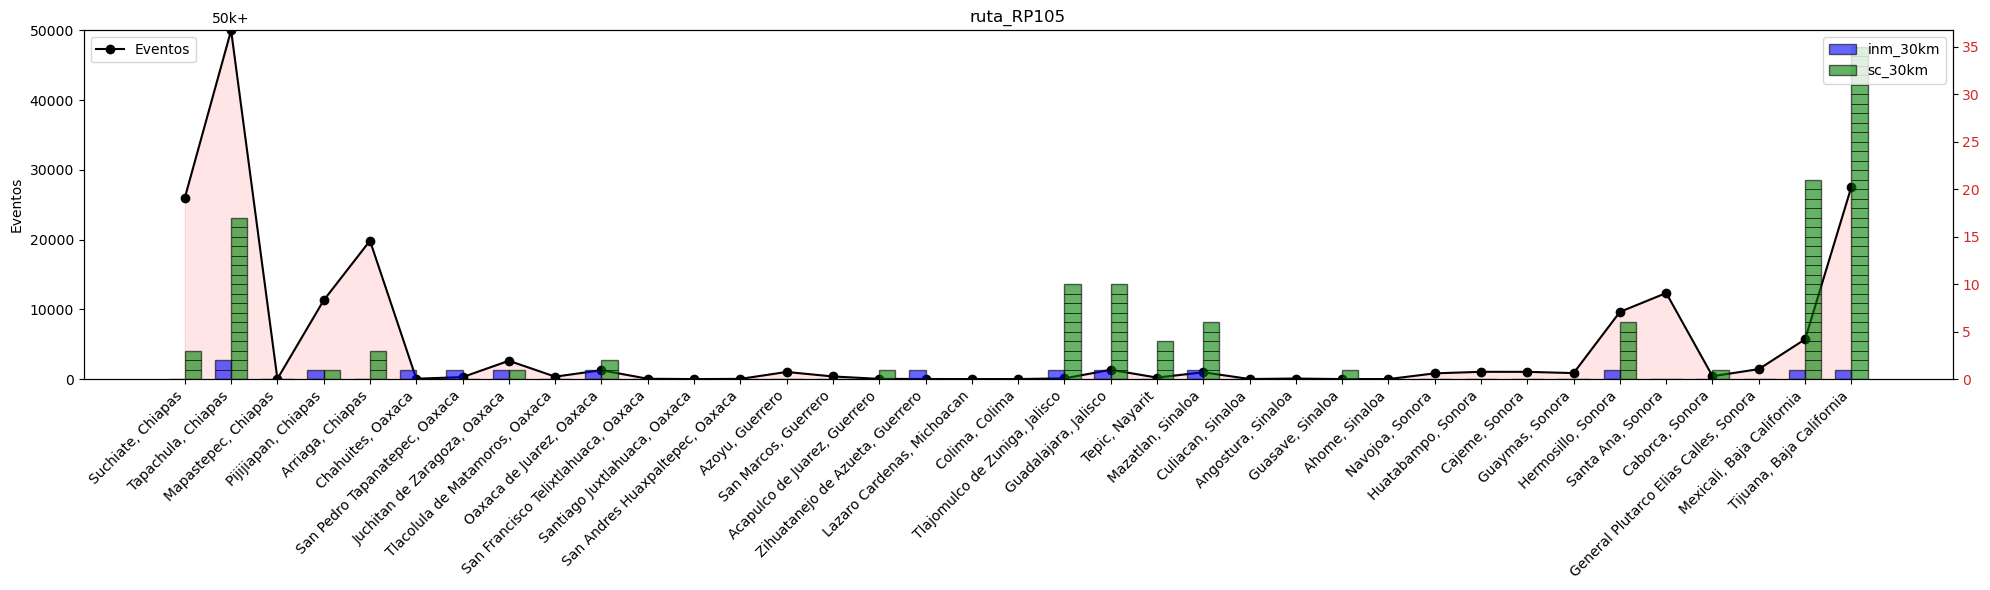

In [16]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP105['ciudad'].unique()[:62]
ruta_RP105_filtered = ruta_RP105[ruta_RP105['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP105_filtered['eventos_capped'] = np.clip(ruta_RP105_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP105_filtered['ciudad'], 0, ruta_RP105_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP105_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP105_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


##### RP639

In [83]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP639', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RP639 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RP639 = ruta_RP639.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/1341041037.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [84]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP639[col] = pd.to_numeric(ruta_RP639[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP639, 
    geometry=gpd.points_from_xy(ruta_RP639.longitud, ruta_RP639.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP6395.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP639.csv"
ruta_RP639.to_csv(output_filename_csv, index=False)








/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/2475367425.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


In [13]:
ruta_RP639 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/rutas_creadas/pacifico/RP639/RP639.csv")

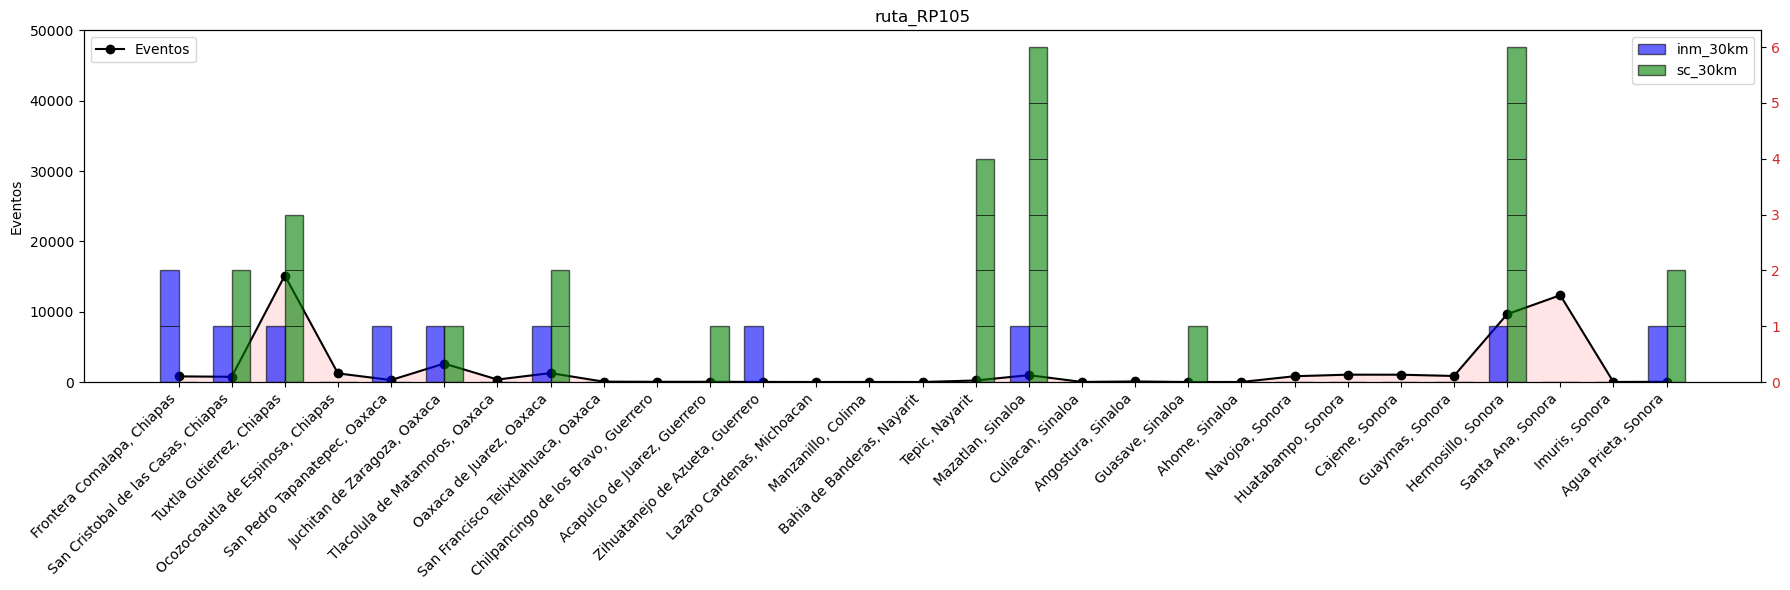

In [14]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP639['ciudad'].unique()[:62]
ruta_RP639_filtered = ruta_RP639[ruta_RP639['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP639_filtered['eventos_capped'] = np.clip(ruta_RP639_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(18, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP639_filtered['ciudad'], 0, ruta_RP639_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP639_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP639_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

### Rutas Centro




##### RC155

In [221]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_centro_sumas.loc[df_centro_sumas['ID_Ruta'] == 'RC155', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RC155 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RC155 = ruta_RC155.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/343352762.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [228]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RC155[col] = pd.to_numeric(ruta_RC155[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RC155, 
    geometry=gpd.points_from_xy(ruta_RC155.longitud, ruta_RC155.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC155/RC155.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC155/RC155.csv"
ruta_RC155.to_csv(output_filename_csv, index=False)


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/3758264294.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


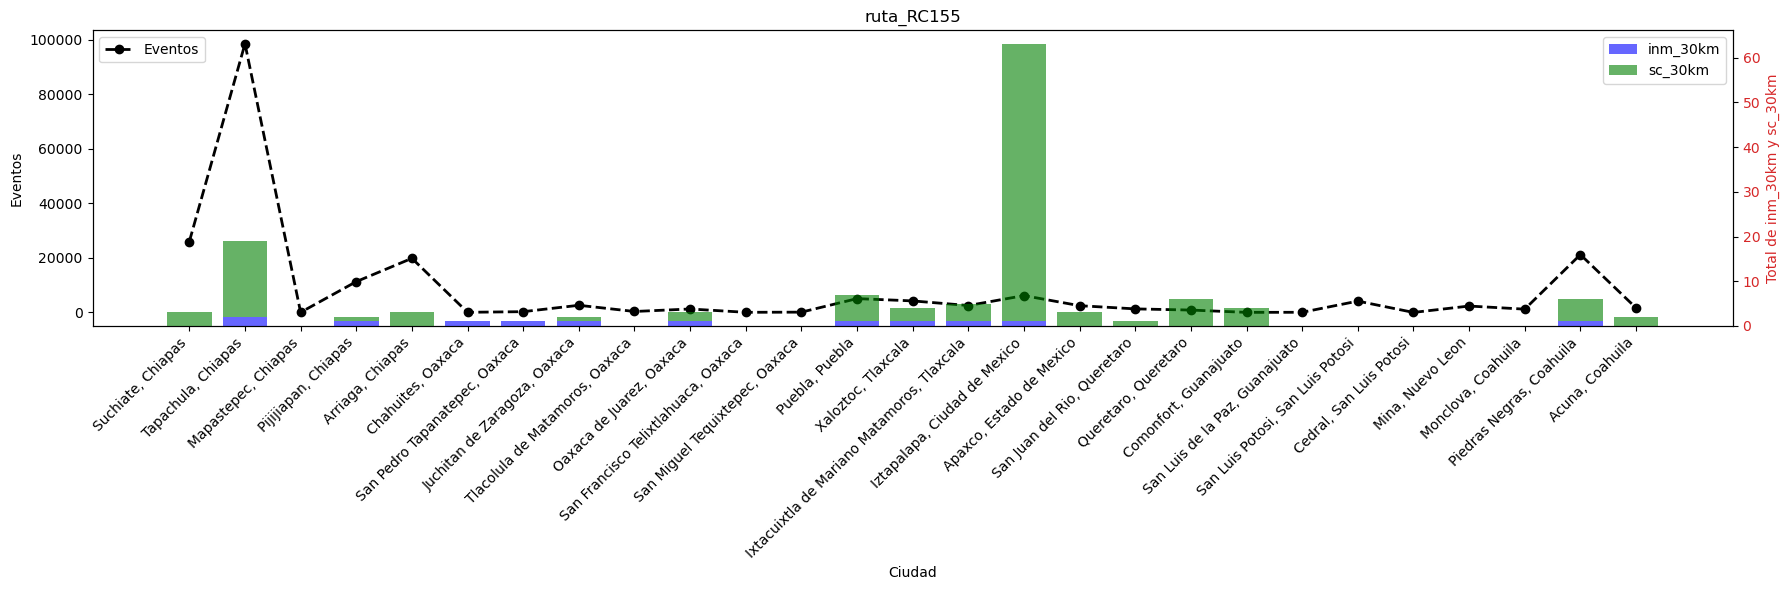

In [229]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RC155['ciudad'], ruta_RC155['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RC155['ciudad'])
ax1.set_xticklabels(ruta_RC155['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RC155['ciudad'], ruta_RC155['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RC155['ciudad'], ruta_RC155['sc_30km'], bottom=ruta_RC155['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RC155')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### RC682

In [122]:
df_centro_sumas.tail(10)

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
494,RC495,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",130318,170907
492,RC493,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",130224,170813
462,RC463,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",129856,170429
464,RC465,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",129821,170394
473,RC474,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",129446,170019
471,RC472,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",129352,169925
441,RC442,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",127380,166579
443,RC444,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",127345,166544
452,RC453,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",126970,166169
450,RC451,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",126876,166075


In [125]:
# Lista de ID_Ruta especificados
id_rutas_especificados = ['RC451']

# Filtrar el DataFrame por los ID_Ruta especificados y luego imprimir la columna 'secuencia'
for id_ruta in id_rutas_especificados:
    secuencia = df_centro_sumas[df_centro_sumas['ID_Ruta'] == id_ruta]['secuencia'].values[0]
    print(f"ID_Ruta: {id_ruta}, Secuencia: {secuencia}")

ID_Ruta: RC451, Secuencia: PG1572, PG1533, PG1494, PG1417, PG1378, PG1339, PG1300, PG1262, PG1223, PG1224, PG1185, PG1146, PG1107, PG1108, PG1169, PG1070, PG1031, PG992, PG993, PG994, PG995, PG956, PG957, PG996, PG997, PG959, PG921, PG922, PG883, PG884, PG845, PG846, PG807, PG808, PG769, PG770, PG771, PG732, PG693, PG694


In [131]:
# Asumiendo que df_secuencias_centro es tu DataFrame

# Aplicamos una función que verifica el final de cada secuencia y, si termina en '694',
# le añade ',PG655, PG617, PG578'
df_secuencias_centro['secuencias'] = df_secuencias_centro['secuencias'].apply(
    lambda x: x + ',PG655, PG617, PG578' if x.endswith('694') else x
)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_centro.head())


                                          secuencias ID_Ruta
0  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC001
1  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC002
2  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC003
3  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC004
4  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   RC005


In [224]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_centro_sumas.loc[df_centro_sumas['ID_Ruta'] == 'RC682', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RC682 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RC682 = ruta_RC682.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/3131748563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [226]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RC682[col] = pd.to_numeric(ruta_RC682[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RC682, 
    geometry=gpd.points_from_xy(ruta_RC682.longitud, ruta_RC682.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC682/RC682.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC682/RC682.csv"
ruta_RC682.to_csv(output_filename_csv, index=False)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/558812181.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


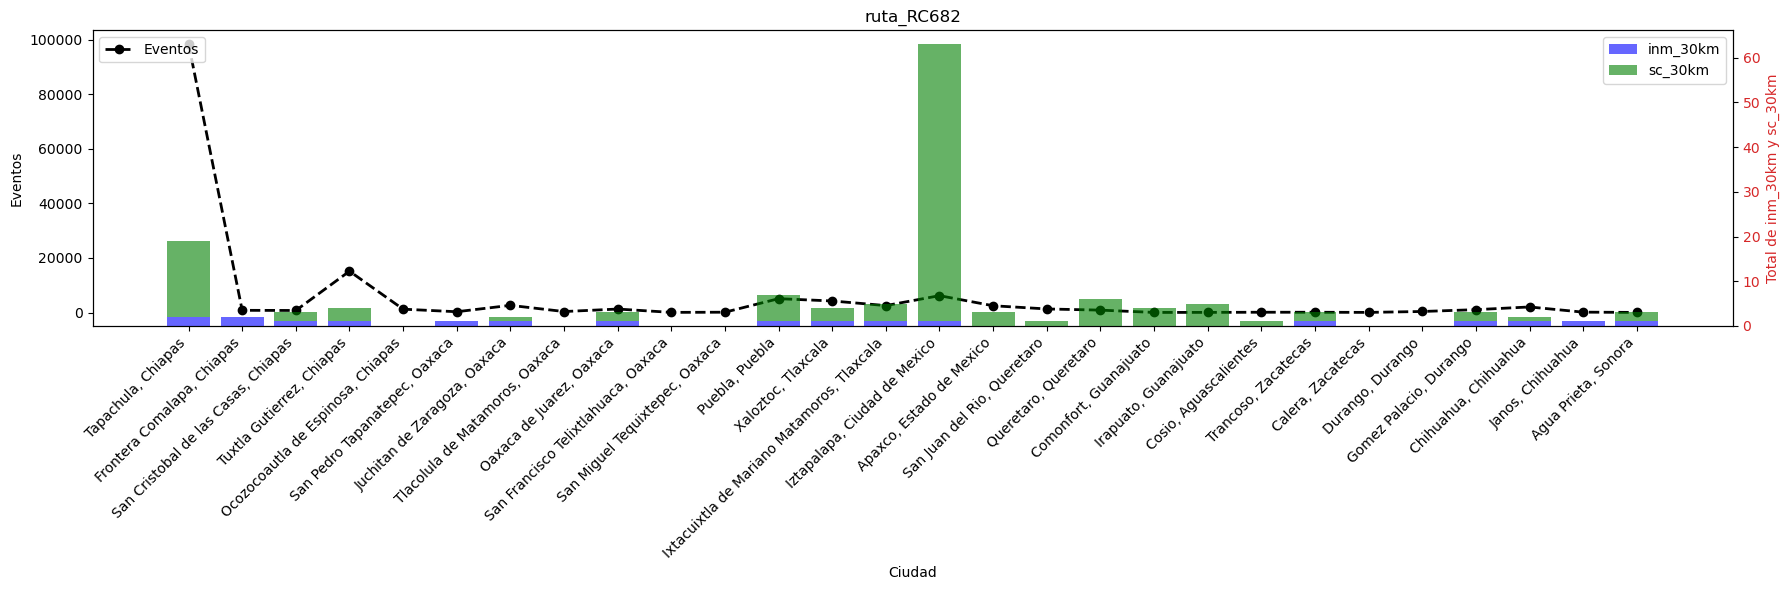

In [227]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RC682['ciudad'], ruta_RC682['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RC682['ciudad'])
ax1.set_xticklabels(ruta_RC682['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RC682['ciudad'], ruta_RC682['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RC682['ciudad'], ruta_RC682['sc_30km'], bottom=ruta_RC682['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RC682')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Rutas Golfo

##### RG381

In [102]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_golfo_sumas.loc[df_golfo_sumas['ID_Ruta'] == 'RG381', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RG381 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RG381 = ruta_RG381.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/1327663735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [103]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RG381[col] = pd.to_numeric(ruta_RG381[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RG381, 
    geometry=gpd.points_from_xy(ruta_RG381.longitud, ruta_RG381.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG381/RG381.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG381/RG381.csv"
ruta_RG381.to_csv(output_filename_csv, index=False)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/1893596754.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


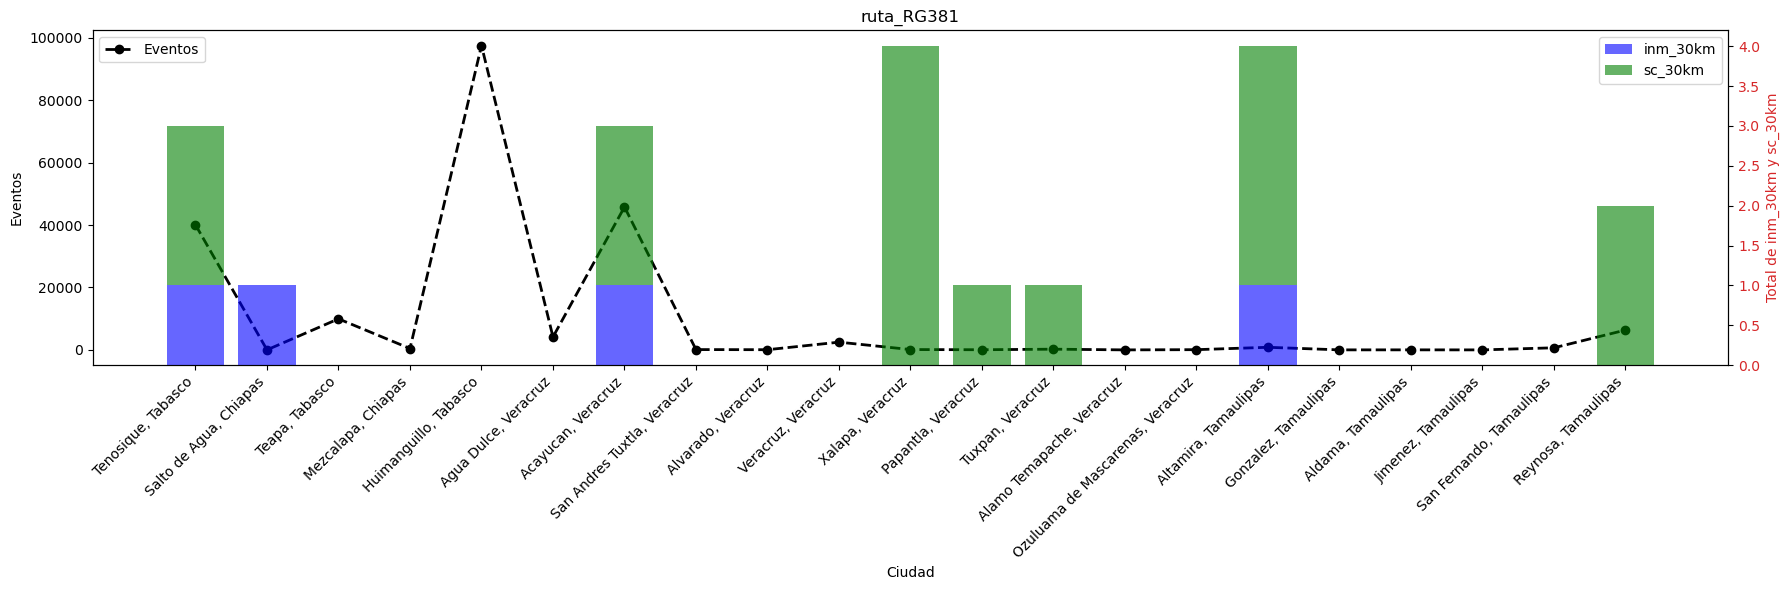

In [105]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG381['ciudad'], ruta_RG381['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG381['ciudad'])
ax1.set_xticklabels(ruta_RG381['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG381['ciudad'], ruta_RG381['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG381['ciudad'], ruta_RG381['sc_30km'], bottom=ruta_RG381['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RG381')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### RG157

In [99]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_golfo_sumas.loc[df_golfo_sumas['ID_Ruta'] == 'RG157', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RG157 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RG157 = ruta_RG157.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/2876929467.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [100]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RG157[col] = pd.to_numeric(ruta_RG157[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RG157, 
    geometry=gpd.points_from_xy(ruta_RG157.longitud, ruta_RG157.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG157/RG157.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG157/RG157.csv"
ruta_RG157.to_csv(output_filename_csv, index=False)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_26172/4192583600.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


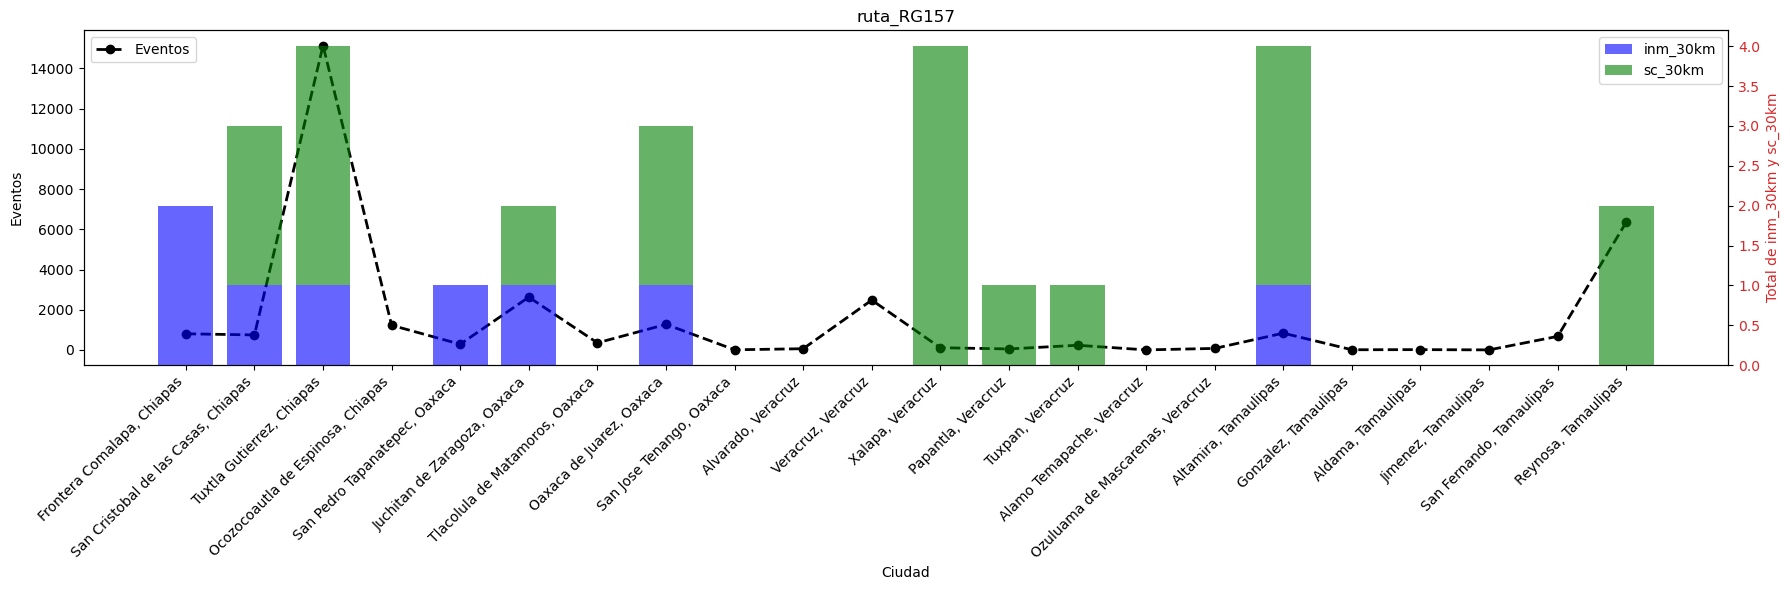

In [101]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG157['ciudad'], ruta_RG157['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG157['ciudad'])
ax1.set_xticklabels(ruta_RG157['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG157['ciudad'], ruta_RG157['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG157['ciudad'], ruta_RG157['sc_30km'], bottom=ruta_RG157['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RG157')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Metricas de Vulnerabilidad